Bước 1. Đọc và chuẩn bị dữ liệu

In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from itertools import product

In [64]:
# Đọc file từ dữ liệu
df=pd.read_csv(r'D:\Data Mining\Thực Hành 2\Gender_Height_Weight.csv')
df.tail(5)

,Gender,Height,Weight
195,Male,145,108
196,Male,157,74
197,Female,177,117
198,Female,166,144
199,Male,193,151


In [65]:
X=df[['Height','Weight']]

In [66]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

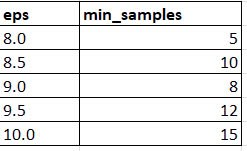

Bước 2. Phân cụm sử dụng DBSCAN

In [67]:
# Các giá trị eps và min_samples cần thử nghiệm
eps_values = [8.0, 8.25, 8.5, 8.75, 9.0]
min_samples_values = [5, 8, 10, 12, 15]

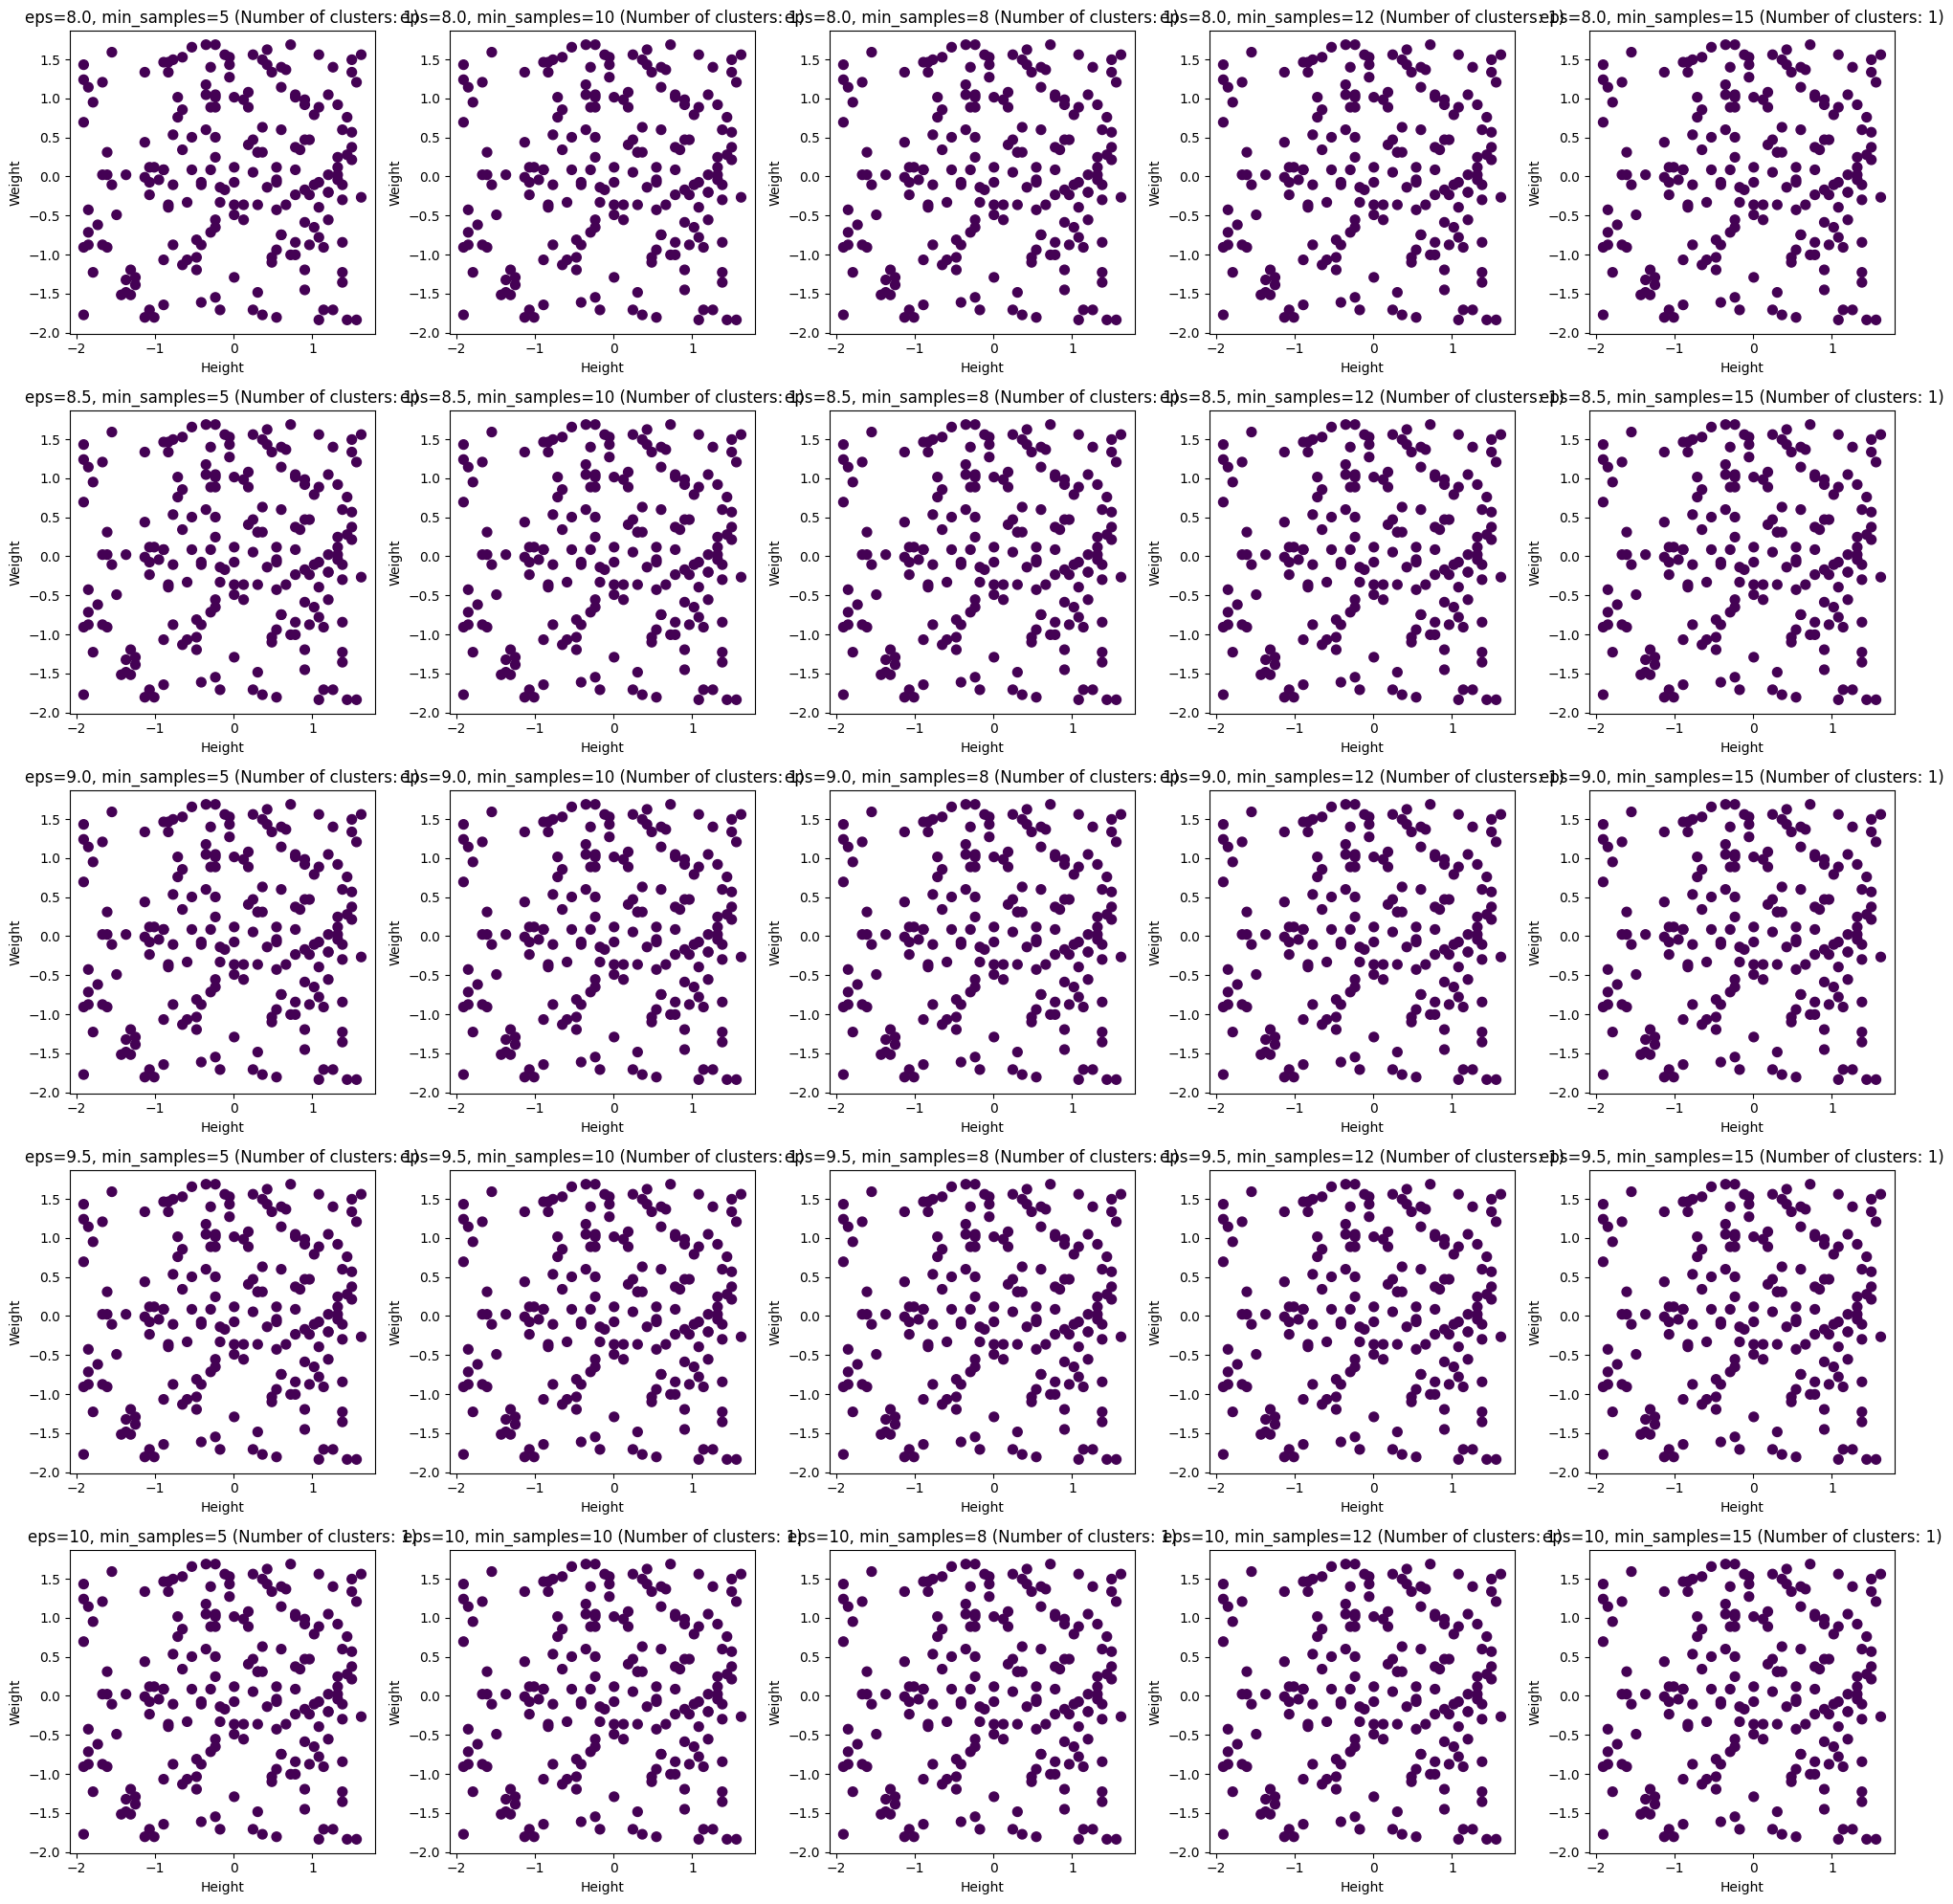

In [82]:
# Hàm phân cụm và vẽ biểu đồ scatter
def plot_dbscan(X, eps, min_samples, ax, title):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    # Vẽ biểu đồ scatter
    scatter = ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
    ax.set_title(f"{title} (Number of clusters: {len(set(clusters)) - (1 if -1 in clusters else 0)})")
    ax.set_xlabel("Height")
    ax.set_ylabel("Weight")
    return clusters

# Vẽ biểu đồ cho các kết hợp của eps và min_samples
fig, axs = plt.subplots(5, 5, figsize=(20, 20))  # 5 dòng, 5 cột

# Lặp qua tất cả các kết hợp của eps và min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        ax = axs[i, j]  # Xác định vị trí biểu đồ
        title = f"eps={eps}, min_samples={min_samples}"
        clusters = plot_dbscan(X_scaled, eps, min_samples, ax, title)

plt.tight_layout()
plt.show()

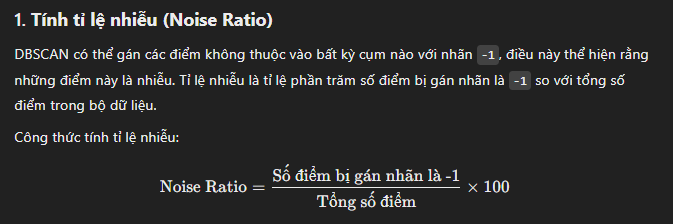

In [85]:
# Lặp qua tất cả các kết hợp của eps và min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):

        # Tính tỷ lệ nhiễu
        noise_points = np.sum(clusters == -1)
        total_points = len(clusters)
        noise_ratio = (noise_points / total_points) * 100
        print(f"eps={eps}, min_samples={min_samples} => Noise Ratio: {noise_ratio:.2f}%")


eps=8.0, min_samples=5 => Noise Ratio: 0.00%
eps=8.0, min_samples=10 => Noise Ratio: 0.00%
eps=8.0, min_samples=8 => Noise Ratio: 0.00%
eps=8.0, min_samples=12 => Noise Ratio: 0.00%
eps=8.0, min_samples=15 => Noise Ratio: 0.00%
eps=8.5, min_samples=5 => Noise Ratio: 0.00%
eps=8.5, min_samples=10 => Noise Ratio: 0.00%
eps=8.5, min_samples=8 => Noise Ratio: 0.00%
eps=8.5, min_samples=12 => Noise Ratio: 0.00%
eps=8.5, min_samples=15 => Noise Ratio: 0.00%
eps=9.0, min_samples=5 => Noise Ratio: 0.00%
eps=9.0, min_samples=10 => Noise Ratio: 0.00%
eps=9.0, min_samples=8 => Noise Ratio: 0.00%
eps=9.0, min_samples=12 => Noise Ratio: 0.00%
eps=9.0, min_samples=15 => Noise Ratio: 0.00%
eps=9.5, min_samples=5 => Noise Ratio: 0.00%
eps=9.5, min_samples=10 => Noise Ratio: 0.00%
eps=9.5, min_samples=8 => Noise Ratio: 0.00%
eps=9.5, min_samples=12 => Noise Ratio: 0.00%
eps=9.5, min_samples=15 => Noise Ratio: 0.00%
eps=10, min_samples=5 => Noise Ratio: 0.00%
eps=10, min_samples=10 => Noise Ratio: 0.00%

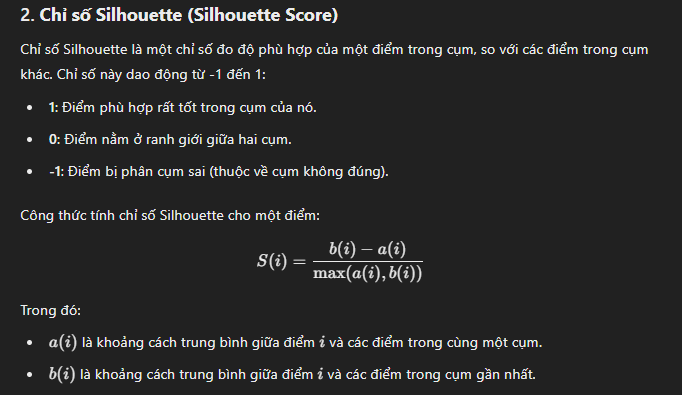

In [88]:
# Lặp qua tất cả các kết hợp của eps và min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):

        # Phân cụm với DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)  # Cập nhật clusters sau mỗi lần phân cụm

        # Tính Silhouette Score
        if len(set(clusters)) > 1:  # Chỉ tính khi có ít nhất 2 cụm
            silhouette_avg = silhouette_score(X_scaled, clusters)
            print(f"eps={eps}, min_samples={min_samples} => Silhouette Score: {silhouette_avg:.2f}")
        else:
            print(f"eps={eps}, min_samples={min_samples} => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)")


eps=8.0, min_samples=5 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.0, min_samples=10 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.0, min_samples=8 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.0, min_samples=12 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.0, min_samples=15 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.5, min_samples=5 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.5, min_samples=10 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.5, min_samples=8 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.5, min_samples=12 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.5, min_samples=15 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=9.0, min_samples=5 => Silhouette Score: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=9.0, min_samples=10 => Silhouette Score: N/A (chỉ có 1 cụm hoặc to

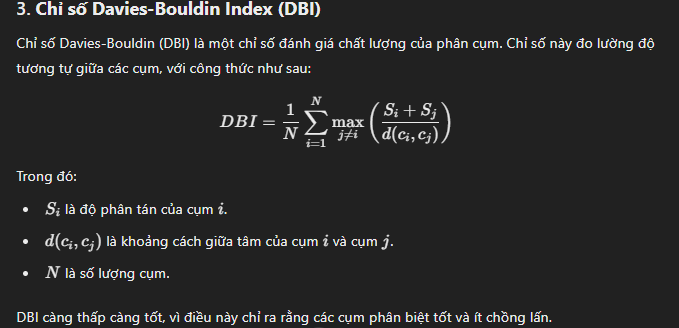

In [89]:
# Lặp qua tất cả các kết hợp của eps và min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):

        # Phân cụm với DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)

        # Tính Davies-Bouldin Index (DBI)
        if len(set(clusters)) > 1:  # Chỉ tính khi có ít nhất 2 cụm
            dbi = davies_bouldin_score(X_scaled, clusters)
            print(f"eps={eps}, min_samples={min_samples} => DBI: {dbi:.2f}")
        else:
            print(f"eps={eps}, min_samples={min_samples} => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)")

eps=8.0, min_samples=5 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.0, min_samples=10 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.0, min_samples=8 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.0, min_samples=12 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.0, min_samples=15 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.5, min_samples=5 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.5, min_samples=10 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.5, min_samples=8 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.5, min_samples=12 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=8.5, min_samples=15 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=9.0, min_samples=5 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=9.0, min_samples=10 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=9.0, min_samples=8 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu)
eps=9.0, min_samples=12 => DBI: N/A (chỉ có 1 cụm hoặc toàn điểm nhiễu

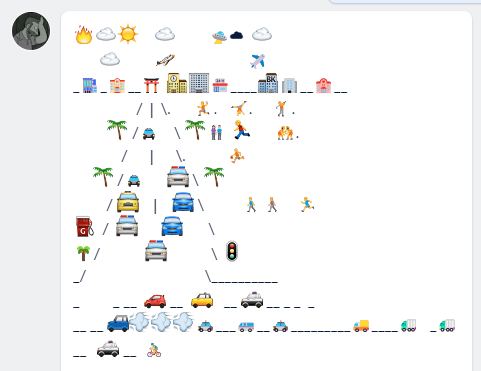

Bước 3. Tìm và lọc các điểm nhiễu

In [90]:
# Hàm lọc điểm nhiễu
def filter_noise(X, clusters):
    # Lọc các điểm nhiễu (có nhãn là -1)
    X_filtered = X[clusters != -1]
    return X_filtered

In [91]:
# Lặp qua tất cả các kết hợp của eps và min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Phân cụm với DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)

        # Lọc các điểm nhiễu
        X_filtered = filter_noise(X_scaled, clusters)

        # In kết quả
        noise_points = np.sum(clusters == -1)
        print(f"eps={eps}, min_samples={min_samples}")
        print(f"Số điểm nhiễu: {noise_points}")
        print(f"Tỷ lệ nhiễu: {noise_points / len(clusters) * 100:.2f}%")
        print(f"Số điểm sau khi lọc nhiễu: {len(X_filtered)}\n")

eps=8.0, min_samples=5
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu: 200

eps=8.0, min_samples=10
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu: 200

eps=8.0, min_samples=8
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu: 200

eps=8.0, min_samples=12
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu: 200

eps=8.0, min_samples=15
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu: 200

eps=8.5, min_samples=5
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu: 200

eps=8.5, min_samples=10
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu: 200

eps=8.5, min_samples=8
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu: 200

eps=8.5, min_samples=12
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu: 200

eps=8.5, min_samples=15
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu: 200

eps=9.0, min_samples=5
Số điểm nhiễu: 0
Tỷ lệ nhiễu: 0.00%
Số điểm sau khi lọc nhiễu

Bước 4. Tìm ra được chỉ số eps và min_sample hợp lý

In [92]:
# Hàm tính toán chỉ số DBI và silhouette
def evaluate_clustering(X, clusters):
    if len(set(clusters)) > 1:  # Kiểm tra có ít nhất 2 cụm
        silhouette_avg = silhouette_score(X, clusters)  # Chỉ số Silhouette
        dbi = davies_bouldin_score(X, clusters)  # Chỉ số Davies-Bouldin
        return silhouette_avg, dbi
    else:
        return -1, float('inf')  # Nếu chỉ có 1 cụm, trả về giá trị không hợp lệ


In [ ]:
best_eps = None
best_min_samples = None
best_silhouette = -1
best_dbi = float('inf')
best_noise_ratio = float('inf')

# Lặp qua tất cả các kết hợp của eps và min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Phân cụm với DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        
        # Tính toán tỷ lệ nhiễu
        noise_points = np.sum(clusters == -1)
        noise_ratio = noise_points / len(clusters) * 100
        
        # Đánh giá chất lượng phân cụm bằng Silhouette Score và DBI
        silhouette_avg, dbi = evaluate_clustering(X_scaled, clusters)
        
        # Chọn kết quả tốt nhất
        if silhouette_avg > best_silhouette and dbi < best_dbi and noise_ratio < best_noise_ratio:
            best_silhouette = silhouette_avg
            best_dbi = dbi
            best_noise_ratio = noise_ratio
            best_eps = eps
            best_min_samples = min_samples

# In ra kết quả tốt nhất
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette:.2f}")
print(f"Best Davies-Bouldin Index: {best_dbi:.2f}")
print(f"Best Noise Ratio: {best_noise_ratio:.2f}%")

Best eps: None
Best min_samples: None
Best Silhouette Score: -1.00
Best Davies-Bouldin Index: inf
Best Noise Ratio: inf%


Chuẩn hóa lại dữ liệu